In [116]:
#### import Libraries
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
import random
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy import signal
from scipy.interpolate import interp1d
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [119]:
#### Upload Data and treat missing values
df = pd.read_excel(r'Macroeconomic_data.xlsx')
df = df.fillna(method='pad')
#print(df.isnull().sum())

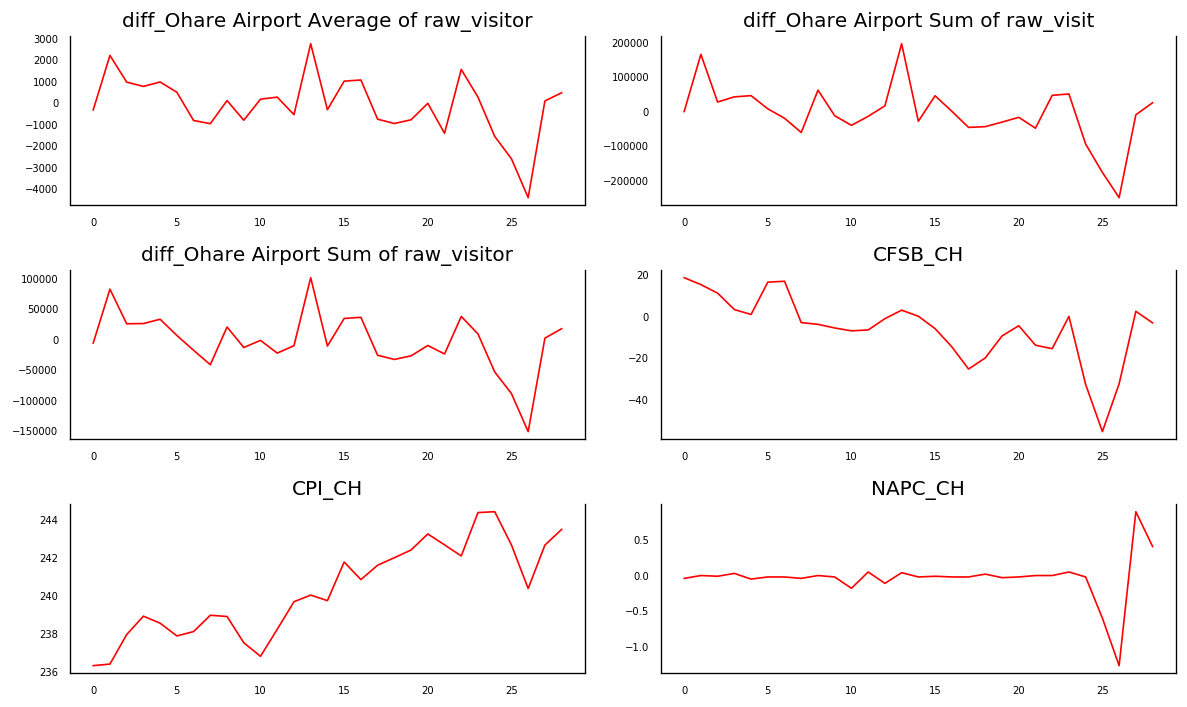

In [14]:
#### plot data
# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    i = i+22  ##### change the number in  order to visualize different series
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();

In [79]:
#### Check gaussian distribution of data
stat,p = stats.normaltest(df['diff_Ohare Airport Sum of raw_visit'])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis)')

Statistics = 6.387, p=0.041
Data looks non-Gaussian (reject null hypothesis)


In [80]:
#### Check normal distribution of data
print("Kurtosis of normal distribution: {}". format(stats.kurtosis(df['diff_Ohare Airport Sum of raw_visit'])))
print("Skewness of normal distribution: {}". format(stats.skew(df['diff_Ohare Airport Sum of raw_visit'])))

Kurtosis of normal distribution: 2.208031070153682
Skewness of normal distribution: -0.3894142768505504


count        29.000000
mean      -8107.655172
std       84183.870957
min     -252296.000000
25%      -42841.000000
50%      -12160.000000
75%       39777.000000
max      193843.000000
Name: diff_Ohare Airport Sum of raw_visit, dtype: float64

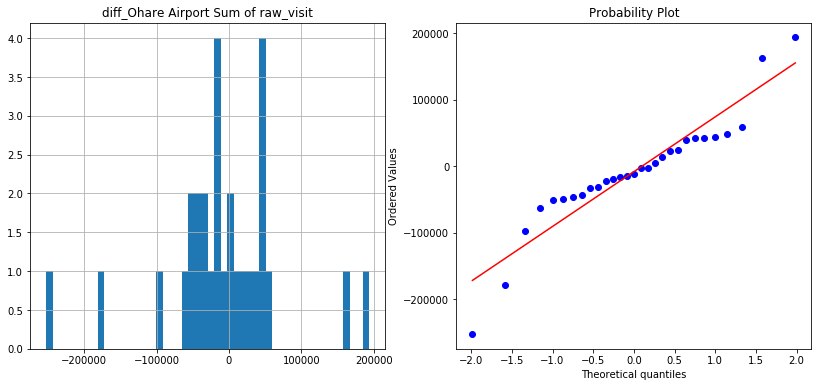

In [78]:
#### Plot data to see the probability plot
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['diff_Ohare Airport Sum of raw_visit'].hist(bins=50)
plt.title('diff_Ohare Airport Sum of raw_visit')
plt.subplot(1,2,2)
stats.probplot(df['diff_Ohare Airport Sum of raw_visit'], plot=plt);
df['diff_Ohare Airport Sum of raw_visit'].describe().T

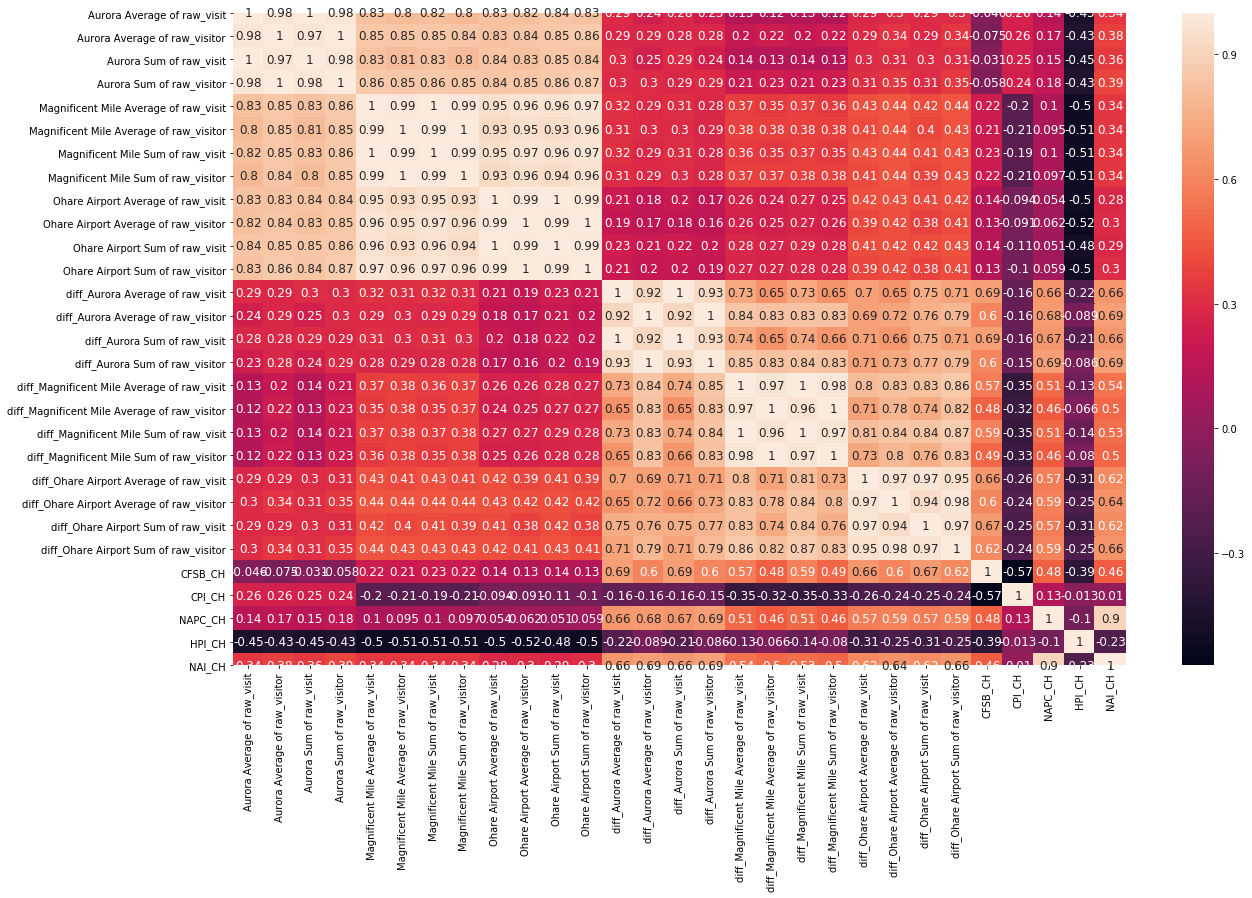

In [160]:
#### Correlation heatmap
df_corr = df.corr()
sns.heatmap(df_corr, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values, annot = True, annot_kws = {'size':12})
heat_map = plt.gcf()
heat_map.set_size_inches(20,12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [171]:
#### heatmap rolling correlation
rolling_corr = df.iloc[:,22:30].rolling(3).corr(pairwise=True)
print(rolling_corr)
rolling_corr.to_excel(r'rolling_corr_3.xlsx', index = False)
# sns.heatmap(rolling_corr, xticklabels = rolling_corr.columns.values, yticklabels = rolling_corr.columns.values, annot = True, annot_kws = {'size':12})
# heat_map = plt.gcf()
# heat_map.set_size_inches(20,12)
# plt.xticks(fontsize = 10)
# plt.yticks(fontsize = 10)
# plt.show()

                                              diff_Ohare Airport Average of raw_visitor  \
0  diff_Ohare Airport Average of raw_visitor                                        NaN   
   diff_Ohare Airport Sum of raw_visit                                              NaN   
   diff_Ohare Airport Sum of raw_visitor                                            NaN   
   CFSB_CH                                                                          NaN   
   CPI_CH                                                                           NaN   
...                                                                                 ...   
28 CFSB_CH                                                                     0.976091   
   CPI_CH                                                                      0.982298   
   NAPC_CH                                                                     0.958995   
   HPI_CH                                                                          -inf   

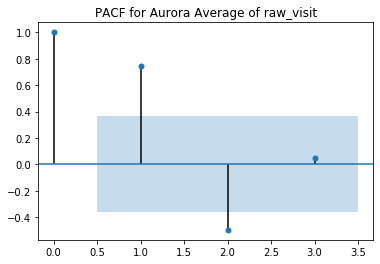

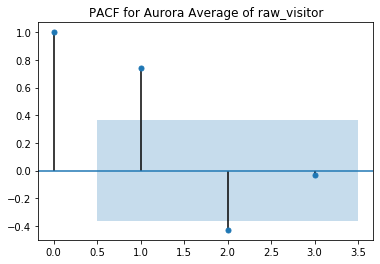

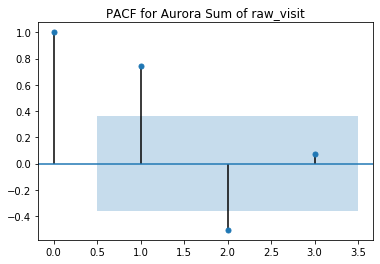

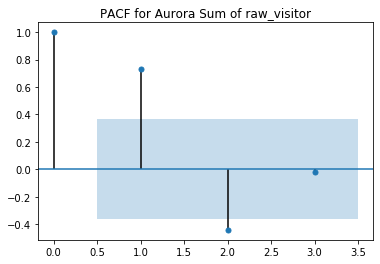

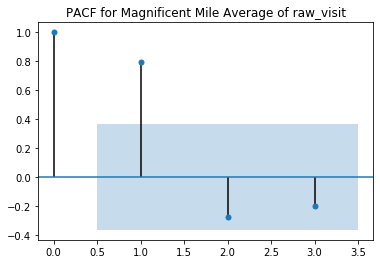

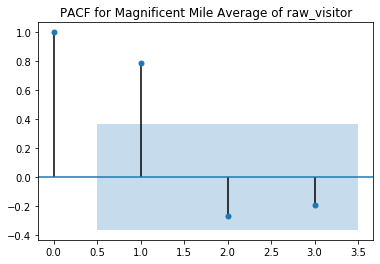

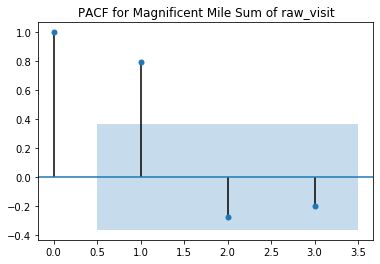

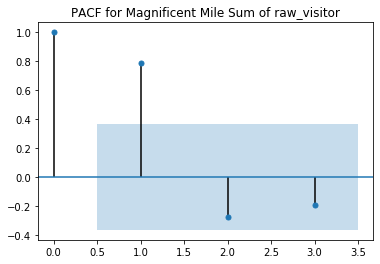

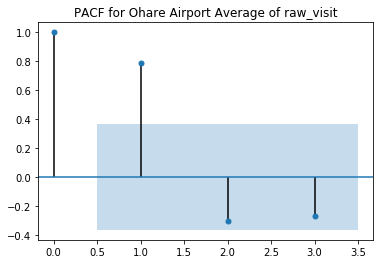

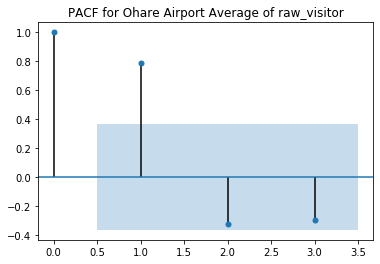

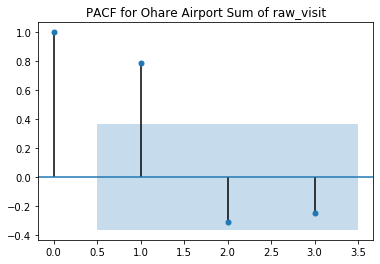

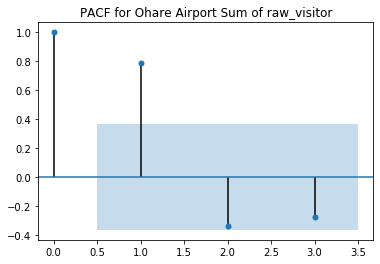

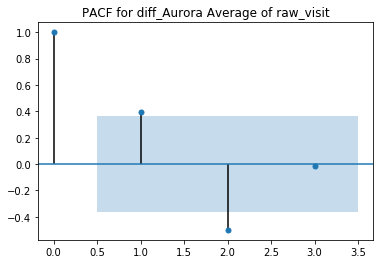

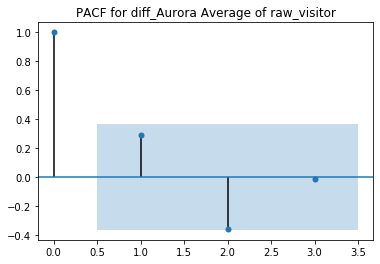

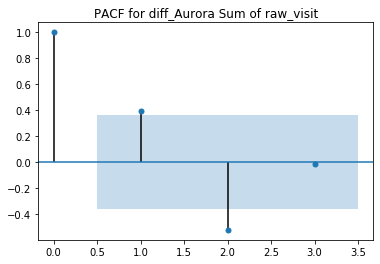

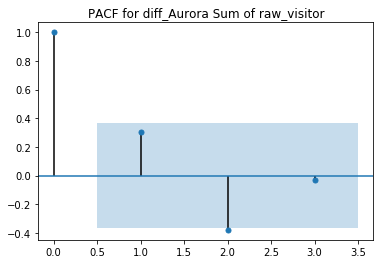

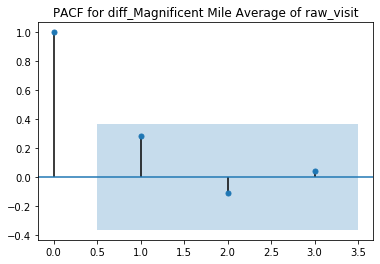

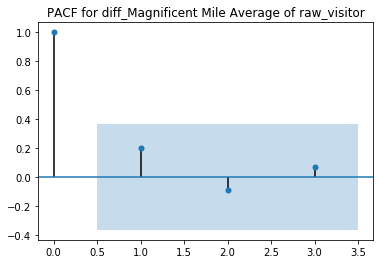

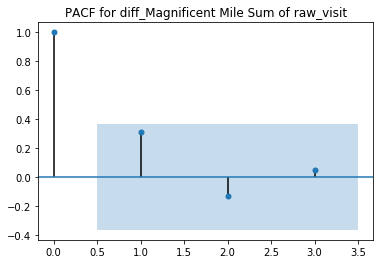

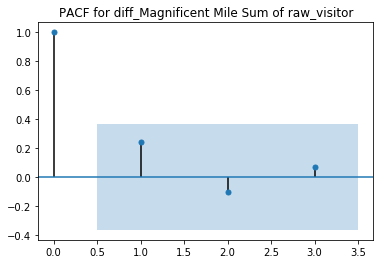

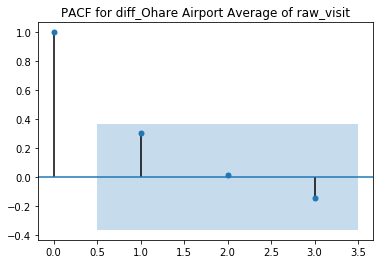

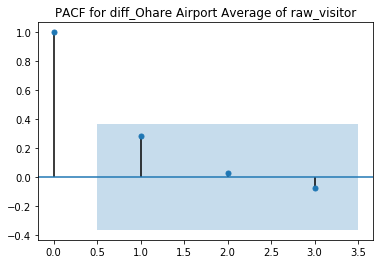

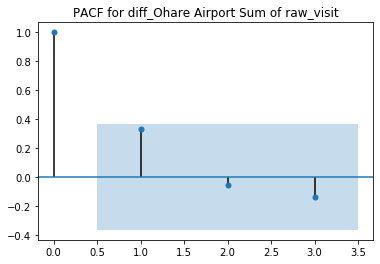

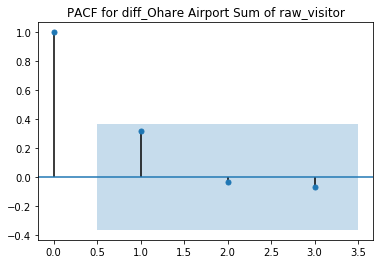

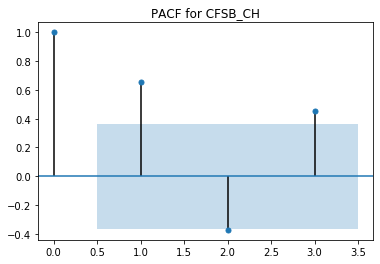

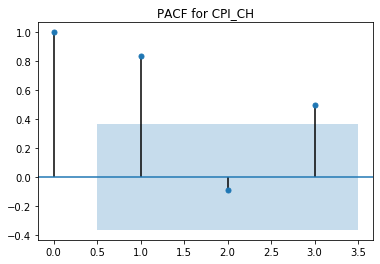

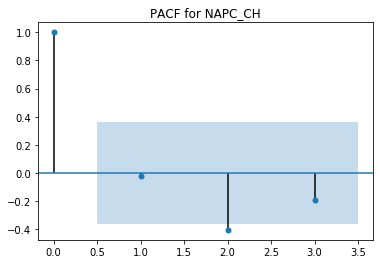

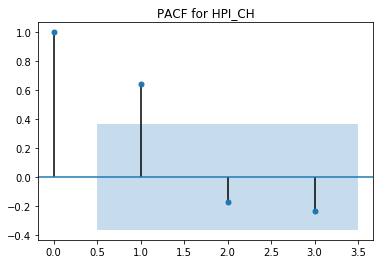

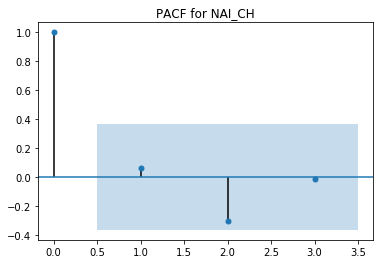

In [159]:
#### Building Var Model
# plots the autocorrelation plots for each stock's price at 3 lags
df_auto_corr = df.iloc[:,1:30]
for i in df_auto_corr.columns:
    plot_pacf(df_auto_corr[i], lags = 3)
    plt.title('PACF for %s' % i)
    plt.show()

In [67]:
#### Split the Series into Training and Testing Data
n_obs=5
X_train, X_test = df[0:-n_obs], df[-n_obs:]
print(X_train.shape, X_test.shape)

(24, 30) (5, 30)


In [75]:
#### Stationarity Check
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
print('Augmented Dickey-Fuller Test: Ohare airport Sum of raw visit Time Series')
augmented_dickey_fuller_statistics(X_train['diff_Ohare Airport Sum of raw_visit'])
print('Augmented Dickey-Fuller Test: Aurora Sum of raw visit Time Series')
augmented_dickey_fuller_statistics(X_train['diff_Aurora Sum of raw_visit'])
#print('Augmented Dickey-Fuller Test: Ohare airport Average of raw visit Time Series')
#augmented_dickey_fuller_statistics(X_train['diff_Ohare Airport Average of raw_visit'])
#print('Augmented Dickey-Fuller Test: CFSB_CH Time Series')
#augmented_dickey_fuller_statistics(X_train['CFSB_CH'])
#print('Augmented Dickey-Fuller Test: CPI_CH Time Series')
#augmented_dickey_fuller_statistics(X_train['CPI_CH'])
#print('Augmented Dickey-Fuller Test: NAPC_CH Time Series')
#augmented_dickey_fuller_statistics(X_train['NAPC_CH'])
print('Augmented Dickey-Fuller Test: NAI_CH Time Series')
augmented_dickey_fuller_statistics(X_train['NAI_CH'])


Augmented Dickey-Fuller Test: Ohare airport Sum of raw visit Time Series
ADF Statistic: -4.448439
p-value: 0.000243
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639
Augmented Dickey-Fuller Test: Aurora Sum of raw visit Time Series
ADF Statistic: -0.169747
p-value: 0.942033
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667
Augmented Dickey-Fuller Test: NAI_CH Time Series
ADF Statistic: -5.068170
p-value: 0.000016
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


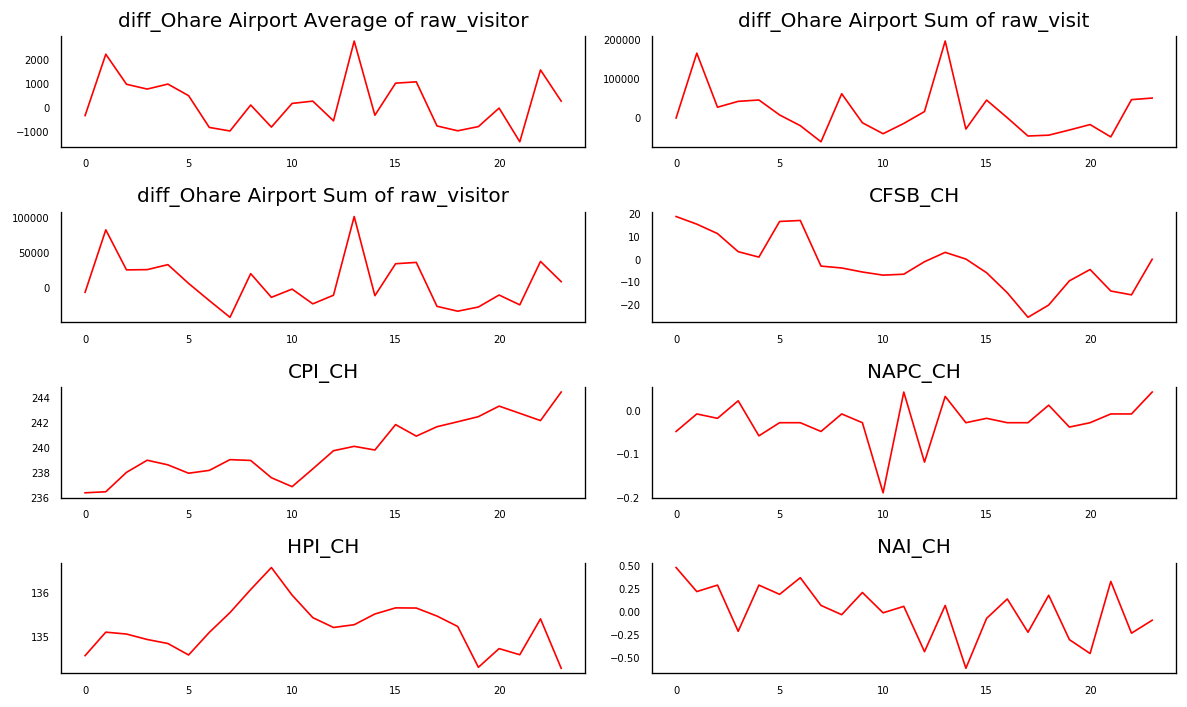

In [83]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    i =i+22
    d = X_train[X_train.columns[i]]
    ax.plot(d, color='red', linewidth=1)# Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();

In [107]:
#### Testing Granger’s Causality
maxlag=3
test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            #print(X_train[[r,c]])
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset
df_Granger = df.iloc[:,22:30]
grangers_causality_matrix(df_Granger, variables = df_Granger.columns)

,diff_Ohare Airport Average of raw_visitor_x,diff_Ohare Airport Sum of raw_visit_x,diff_Ohare Airport Sum of raw_visitor_x,CFSB_CH_x,CPI_CH_x,NAPC_CH_x,HPI_CH_x,NAI_CH_x
diff_Ohare Airport Average of raw_visitor_y,1.0000,0.1508,0.1637,0.0006,0.0163,0.0062,0.1721,0.3708
diff_Ohare Airport Sum of raw_visit_y,0.5531,1.0000,0.4015,0.0006,0.0098,0.0046,0.2467,0.6046
diff_Ohare Airport Sum of raw_visitor_y,0.4821,0.2285,1.0000,0.0004,0.0276,0.0104,0.2898,0.3983
CFSB_CH_y,0.1500,0.3414,0.3230,1.0000,0.0000,0.0096,0.1511,0.0035
CPI_CH_y,0.2510,0.1826,0.2398,0.0137,1.0000,0.1694,0.1034,0.0026
NAPC_CH_y,0.0947,0.0626,0.0901,0.0000,0.0871,1.0000,0.0079,0.0000
HPI_CH_y,0.0300,0.1832,0.0984,0.0474,0.3724,0.4285,1.0000,0.3836
NAI_CH_y,0.0544,0.0291,0.0576,0.0000,0.0201,0.0000,0.0116,1.0000


In [179]:
#### Implementing VAR model
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
data_VAR = X_train[['diff_Ohare Airport Sum of raw_visit','NAI_CH']]
mod = VAR(data_VAR)
# for i in [1,2,3,4,5,6,7,8,9]:
#     result = mod.fit(i)
#     print('Lag Order =', i)
#     print('AIC : ', result.aic)
#     print('BIC : ', result.bic)
#     print('FPE : ', result.fpe)
#     print('HQIC: ', result.hqic, '\n')
res = mod.fit(maxlags= 2)
print(res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 27, Oct, 2020
Time:                     21:45:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    20.3426
Nobs:                     22.0000    HQIC:                   19.9635
Log likelihood:          -270.747    FPE:                4.22976e+08
AIC:                      19.8467    Det(Omega_mle):     2.80823e+08
--------------------------------------------------------------------
Results for equation diff_Ohare Airport Sum of raw_visit
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                       2615.396317     12735.855731            0.205           0.837
L1.diff_Ohare Airport Sum of raw_vis

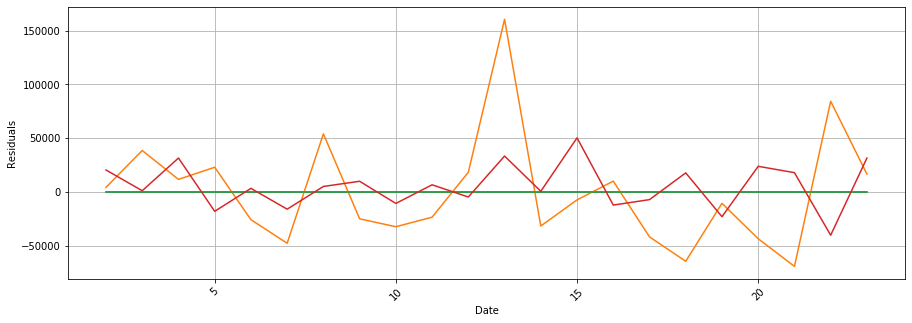

In [157]:
#### Generating residual plots
residuals = res.resid
y_fitted = res.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(residuals, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)